In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from zipfile import ZipFile

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
#Load data - please don't change this part. 
df = pd.read_csv("Student Performance new.csv")
df.drop(columns={"Unnamed: 0"}, inplace=True)
df.head(10)

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M
5,group B,associate's degree,standard,none,0.71,0.83,0.78,F
6,group B,some college,standard,completed,0.88,0.95,0.92,F
7,group B,some college,free/reduced,none,0.40,0.43,0.39,M
8,group D,high school,free/reduced,completed,0.64,0.64,0.67,M
9,group B,high school,free/reduced,none,0.38,0.60,0.50,F


<h1>Part 1: Is There a Significant Difference Between Boys and Girls in Math? (10 pts) </h1>

Investigate and justify your answer. You should show 'a few' pieces of evidence to bolster your conclusion. Use your judgement on what makes a good piece of evidence.

Please format your justifications in a:
<ul>
<li>List
<li>of
<li>points.
</ul>

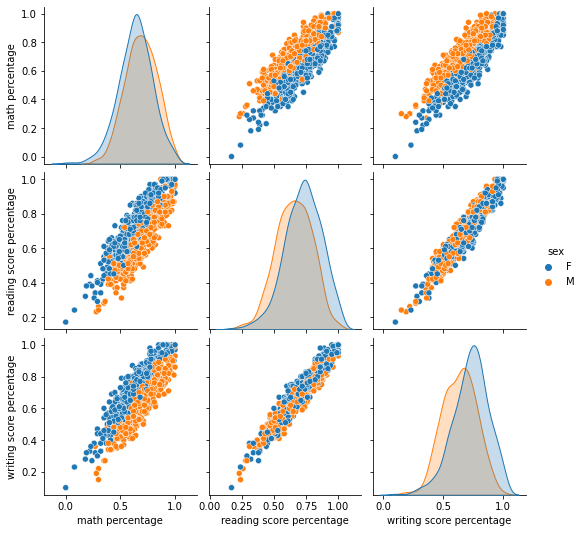

In [3]:
#Generate pairplot
sns.pairplot(df, dropna=True, hue="sex")
plt.show()

In [4]:
#Difference in math
boys = df[df["sex"]=="M"]
girls = df[df["sex"]=="F"]
print(boys["math percentage"].describe())
print(girls["math percentage"].describe())


count    482.000000
mean       0.687282
std        0.143563
min        0.270000
25%        0.590000
50%        0.690000
75%        0.790000
max        1.000000
Name: math percentage, dtype: float64
count    518.000000
mean       0.636332
std        0.154915
min        0.000000
25%        0.540000
50%        0.650000
75%        0.740000
max        1.000000
Name: math percentage, dtype: float64


In [5]:
print("Boys-Maths mean: ", boys["math percentage"].mean(),"median: ", boys["math percentage"].median())
print("girls-Maths mean: ", girls["math percentage"].mean(), "median: ", girls["math percentage"].median())


Boys-Maths mean:  0.6872821576763488 median:  0.69
girls-Maths mean:  0.636332046332046 median:  0.65


<AxesSubplot:xlabel='math percentage', ylabel='Density'>

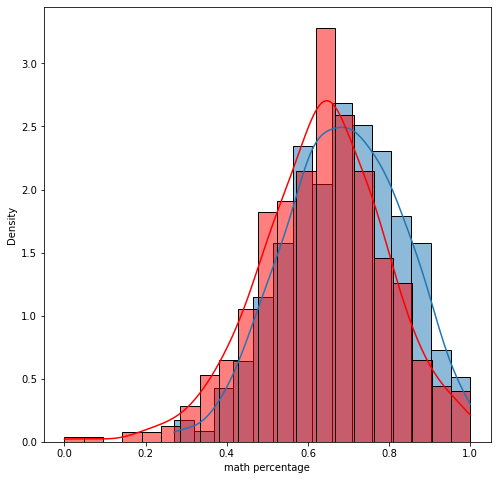

In [6]:
sns.histplot(boys["math percentage"], kde=True, stat="density")
sns.histplot(girls["math percentage"], kde=True, stat="density", color='red')

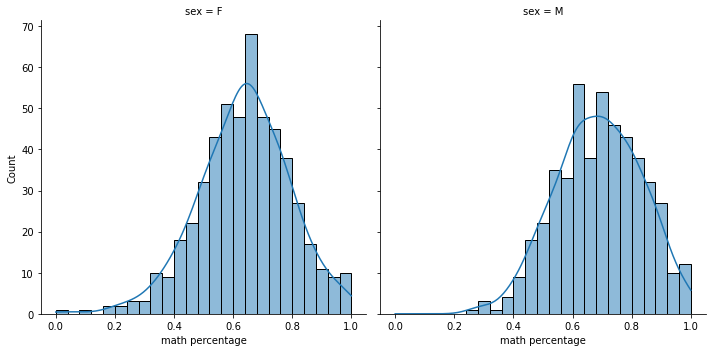

In [7]:
sns.displot(data=df, x="math percentage", kde=True, col="sex")

In [8]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d
def overlap_superiority(control, treatment, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    control: scipy.stats rv object
    treatment: scipy.stats rv object
    n: sample size
    """
    control_sample = control.rvs(n)
    treatment_sample = treatment.rvs(n)
    thresh = (control.mean() + treatment.mean()) / 2
    
    control_above = sum(control_sample > thresh)
    treatment_below = sum(treatment_sample < thresh)
    overlap = (control_above + treatment_below) / n
    
    superiority = (treatment_sample > control_sample).mean()
    return overlap, superiority
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    control = ss.norm(0, 1)
    treatment = ss.norm(cohen_d, 1)
    xs, ys = eval_pdf(control)
    plt.fill_between(xs, ys, label='control', color='C1', alpha=0.5)

    xs, ys = eval_pdf(treatment)
    plt.fill_between(xs, ys, label='treatment', color='C0', alpha=0.5)
    
    o, s = overlap_superiority(control, treatment)
    plt.text(0, 0.05, 'overlap ' + str(o))
    plt.text(0, 0.15, 'superiority ' + str(s))
    plt.show()
    #print('overlap', o)
    #print('superiority', s)

In [9]:
CohenEffectSize(boys["math percentage"], girls["math percentage"])


0.34068813083075017

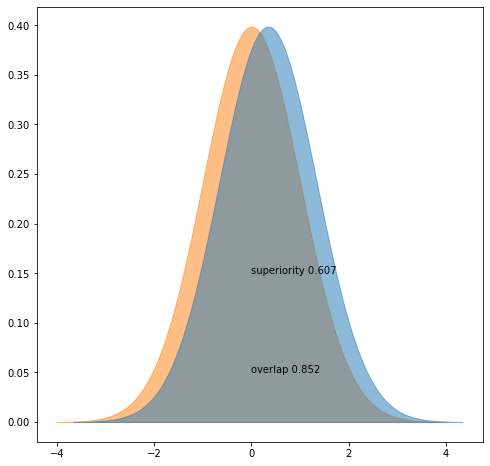

In [10]:
dCohen = CohenEffectSize(boys["math percentage"], girls["math percentage"])
plot_pdfs(dCohen)

Observations:
<ul>
<li>Mean of math percentage of boys (0.69) is slightly higher than that of girls (0.64) 
<li>Median of math percentage of boys (0.69) is slightly higher than that of girls (0.65) 
<li>The Cohen Effect Size of math percentage of boys with girls is 0.341
<li>Girls' math percentage has more values towards minimum scores (minimum = 0), however, boys' minimum is 0.27.
<li>Both have same maximum value (1.0)
<li>KDE plots show that both are comparitively similar.
</ul>



From the evaluation, we can find that there is no significant change in math percentage between boys and girls apart from the slight difference between their means/medians. 

<h1>Part 2: Is there a difference in math performance depending on Parental Education (15 pts)</h1>

Investigate and justify your answer. You should show 'a few' pieces of evidence to bolster your conclusion.

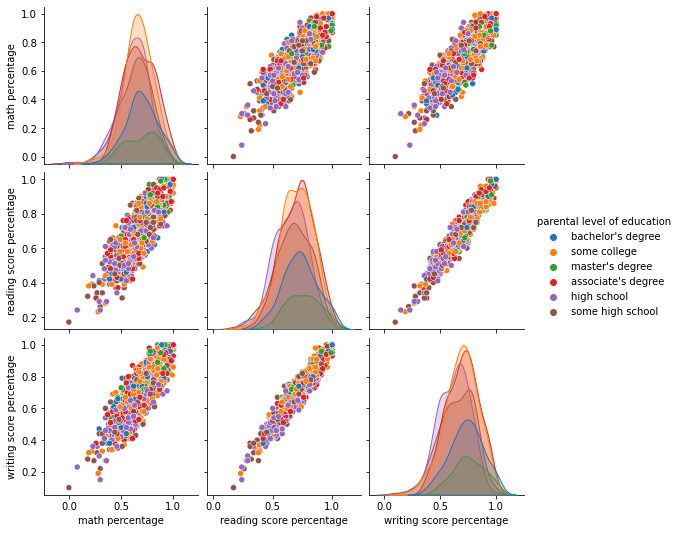

In [11]:
#Generate pairplot
sns.pairplot(df, dropna=True, hue="parental level of education")
plt.show()

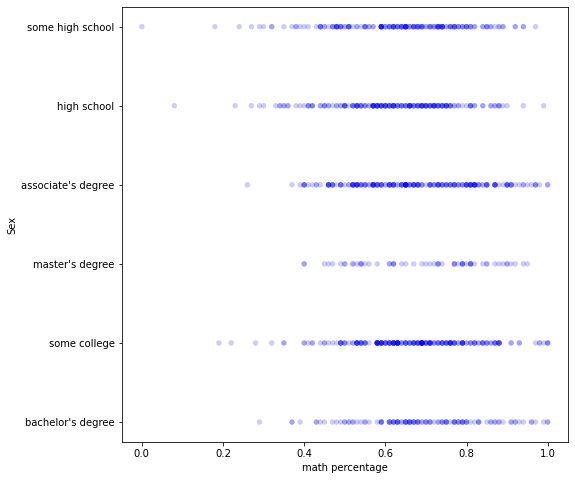

<Figure size 576x432 with 0 Axes>

In [12]:
# Scatterplot
thinkplot.Scatter(df["math percentage"], df["parental level of education"])
thinkplot.Show(xlabel="math percentage", ylabel="Sex")

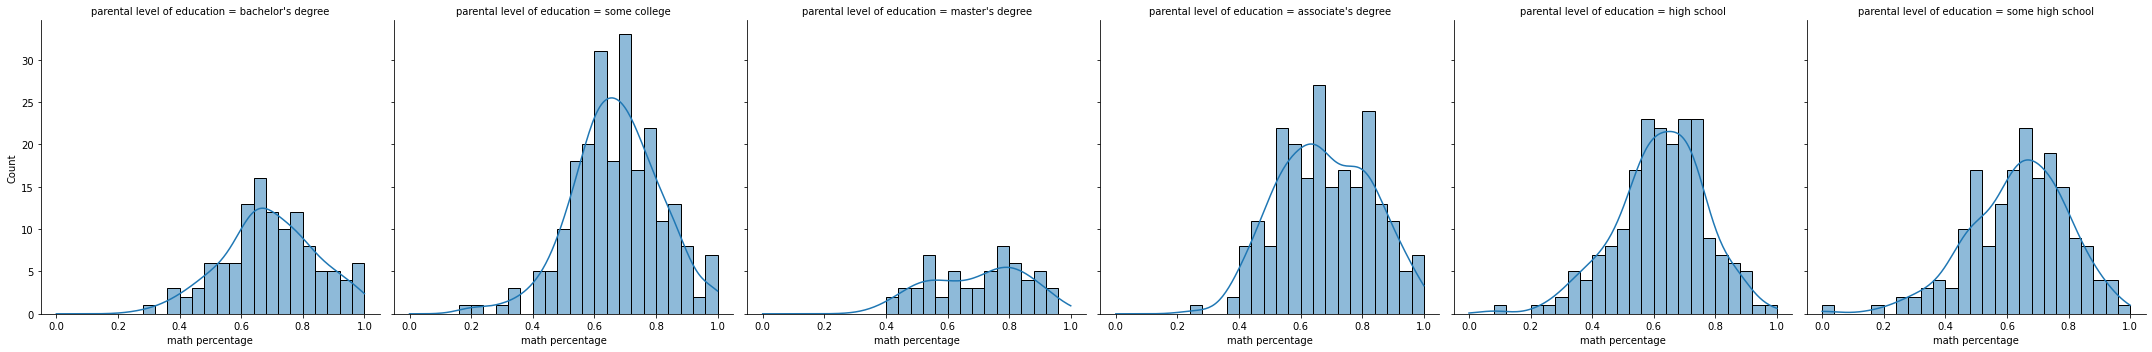

In [13]:
sns.displot(data=df, x="math percentage", kde=True, col="parental level of education")

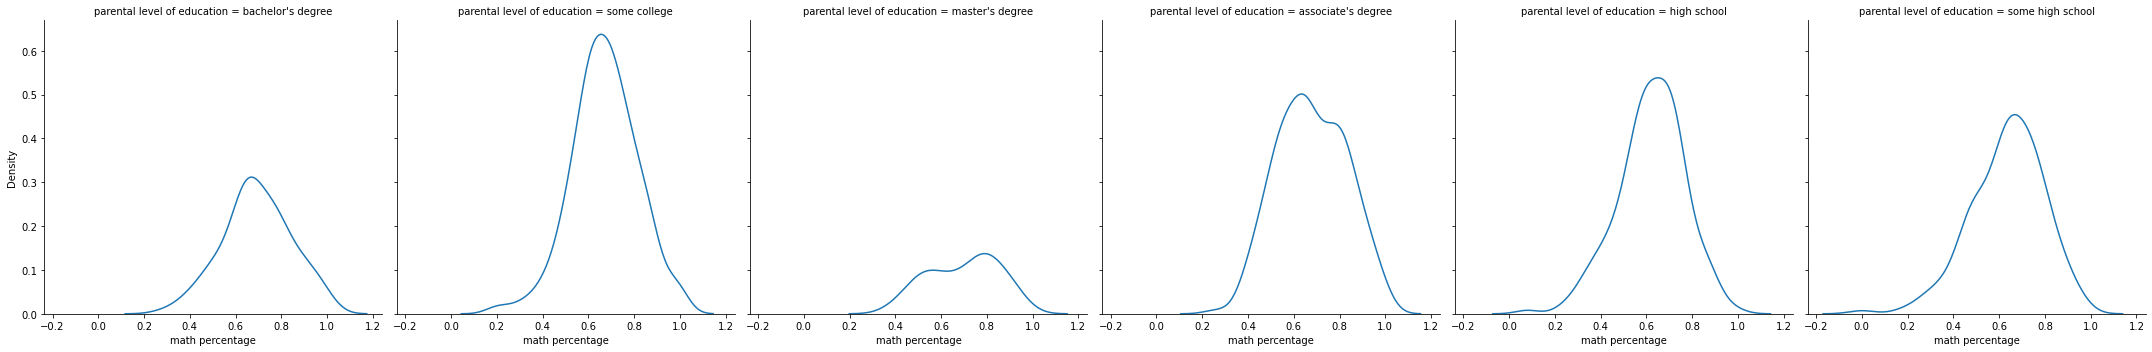

In [14]:
sns.displot(data=df, x="math percentage", kind="kde", col="parental level of education")

In [15]:
#Differnce in math
bachelors = df[df["parental level of education"]=="bachelor's degree"]
some_college = df[df["parental level of education"]=="some college"]
masters = df[df["parental level of education"]=="master's degree"]
associates = df[df["parental level of education"]=="associate's degree"]
high_school = df[df["parental level of education"]=="high school"]
some_high_school = df[df["parental level of education"]=="some high school"]


In [16]:
print("bachelors")
print(bachelors["math percentage"].describe())
print("some_college")
print(some_college["math percentage"].describe())

bachelors
count    118.000000
mean       0.693898
std        0.149438
min        0.290000
25%        0.610000
50%        0.680000
75%        0.790000
max        1.000000
Name: math percentage, dtype: float64
some_college
count    226.000000
mean       0.671283
std        0.143129
min        0.190000
25%        0.590000
50%        0.675000
75%        0.760000
max        1.000000
Name: math percentage, dtype: float64


In [17]:
print("masters")
print(masters["math percentage"].describe())
print("associates")
print(associates["math percentage"].describe())

masters
count    59.000000
mean      0.697458
std       0.151539
min       0.400000
25%       0.555000
50%       0.730000
75%       0.810000
max       0.950000
Name: math percentage, dtype: float64
associates
count    222.000000
mean       0.678829
std        0.151121
min        0.260000
25%        0.570000
50%        0.670000
75%        0.800000
max        1.000000
Name: math percentage, dtype: float64


In [18]:
print("high_school")
print(high_school["math percentage"].describe())
print("some_high_school")
print(some_high_school["math percentage"].describe())

high_school
count    196.000000
mean       0.621378
std        0.145397
min        0.080000
25%        0.537500
50%        0.630000
75%        0.720000
max        0.990000
Name: math percentage, dtype: float64
some_high_school
count    179.000000
mean       0.634972
std        0.159280
min        0.000000
25%        0.530000
50%        0.650000
75%        0.740000
max        0.970000
Name: math percentage, dtype: float64


In [19]:
print("bachelors - math percentage :            mean: ", bachelors["math percentage"].mean(), "        median", bachelors["math percentage"].median(), "        std:", bachelors["math percentage"].std())
print("some_college - math percentage :         mean: ", some_college["math percentage"].mean(), "        median", some_college["math percentage"].median(), "       std:", some_college["math percentage"].std())
print("masters - math percentage :              mean: ", masters["math percentage"].mean(), "        median", masters["math percentage"].median(), "        std:", masters["math percentage"].std())
print("associates - math percentage :           mean: ", associates["math percentage"].mean(), "        median", associates["math percentage"].median(), "        std:", associates["math percentage"].std())
print("high_school - math percentage :          mean: ", high_school["math percentage"].mean(), "        median", high_school["math percentage"].median(), "        std:", high_school["math percentage"].std())
print("some_high_school - math percentage :     mean: ", some_high_school["math percentage"].mean(), "        median", some_high_school["math percentage"].median(), "        std:", some_high_school["math percentage"].std())

bachelors - math percentage :            mean:  0.6938983050847456         median 0.68         std: 0.14943788635230554
some_college - math percentage :         mean:  0.6712831858407079         median 0.675        std: 0.1431289686666647
masters - math percentage :              mean:  0.6974576271186439         median 0.73         std: 0.1515391518812648
associates - math percentage :           mean:  0.6788288288288293         median 0.67         std: 0.1511209322983175
high_school - math percentage :          mean:  0.6213775510204079         median 0.63         std: 0.14539650581673325
some_high_school - math percentage :     mean:  0.6349720670391062         median 0.65         std: 0.15927989039746723


In [20]:
print("bachelors - math percentage :            min: ", bachelors["math percentage"].min(), "        max", bachelors["math percentage"].max())
print("some_college - math percentage :         min: ", some_college["math percentage"].min(), "        max", some_college["math percentage"].max())
print("masters - math percentage :              min: ", masters["math percentage"].min(), "         max", masters["math percentage"].max())
print("associates - math percentage :           min: ", associates["math percentage"].min(), "        max", associates["math percentage"].max())
print("high_school - math percentage :          min: ", high_school["math percentage"].min(), "        max", high_school["math percentage"].max())
print("some_high_school - math percentage :     min: ", some_high_school["math percentage"].min(), "         max", some_high_school["math percentage"].max())

bachelors - math percentage :            min:  0.29         max 1.0
some_college - math percentage :         min:  0.19         max 1.0
masters - math percentage :              min:  0.4          max 0.95
associates - math percentage :           min:  0.26         max 1.0
high_school - math percentage :          min:  0.08         max 0.99
some_high_school - math percentage :     min:  0.0          max 0.97


Observations:
<ul>
<li>Mean of math percentage of parental education masters (0.697) is higher than others. high_school is the lowest (0.621).
<li>Median of math percentage of parental education masters (0.73) is higher than others. high_school is the lowest (0.63).
<li>Minimum value is higher for parental education masters (0.4). 
<li>Overall, math percentage is higher for masters, bachelors, associates and some-college.
<li>It is lower for high_school and some_high_school.
<li>There is a significant difference in the distribution of parental education. From the plots, it is clear that parents with masters are less. Bachelors are the next lowest. Each has a different distribution when plotted against math percentage.
<li>Thus, parental education has a significant impact on math percentage.
</ul>

<AxesSubplot:xlabel='math percentage', ylabel='Density'>

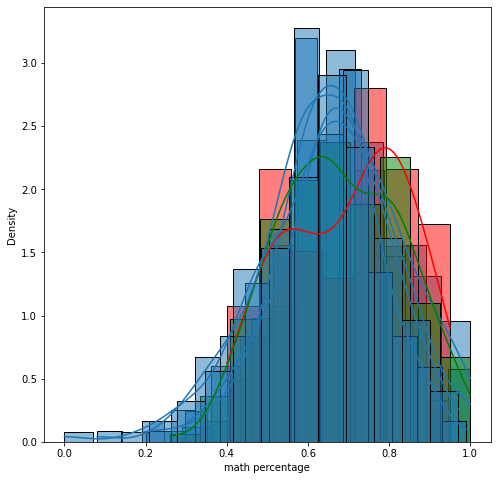

In [21]:
sns.histplot(bachelors["math percentage"], kde=True, stat="density")
sns.histplot(some_college["math percentage"], kde=True, stat="density")
sns.histplot(masters["math percentage"], kde=True, stat="density", color="red")
sns.histplot(associates["math percentage"], kde=True, stat="density", color="green")
sns.histplot(high_school["math percentage"], kde=True, stat="density")
sns.histplot(some_high_school["math percentage"], kde=True, stat="density")


<h1>What appears to be the best predictor of writing performance? (10pts)</h1>

Justify your answer with about 2-3 sentences. Please also show the analysis that you did to draw your conclusion. There are multiple ways that you could come to a conclusion. 

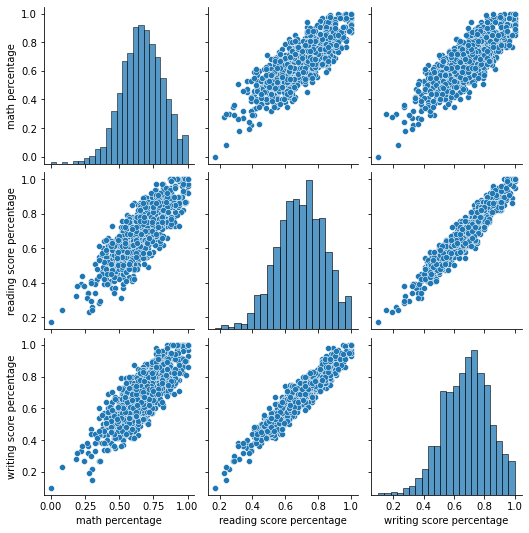

In [22]:
#Generate pairplot
sns.pairplot(df, dropna=True)
plt.show()

In [23]:
#Predictor of writing performance
#Calculate some correlations
print("Writing - Reading: Pearson Correlation:-    ", thinkstats2.Corr(df["writing score percentage"],df["reading score percentage"]), "    Spearmann Correlation: ", thinkstats2.SpearmanCorr(df["writing score percentage"], df["reading score percentage"]))
print("Writing - Math:    Pearson Correlation:-    ", thinkstats2.Corr(df["writing score percentage"],df["math percentage"]), "    Spearmann Correlation: ", thinkstats2.SpearmanCorr(df["writing score percentage"], df["math percentage"]))

Writing - Reading: Pearson Correlation:-     0.9545980771462479     Spearmann Correlation:  0.9489525187100919
Writing - Math:    Pearson Correlation:-     0.8026420459498078     Spearmann Correlation:  0.7783385899971922


In [24]:
print(CohenEffectSize(df["reading score percentage"], df["writing score percentage"]))
print(CohenEffectSize(df["math percentage"], df["writing score percentage"]))

0.07482769876472438
-0.12945195063709158


Observations:
<ul>
<li>Pearson Correlation of writing score percentage with reading score percentage (0.955) is higher than that with math percentage (0.803).
<li>Spearmann Correlation of writing score percentage with reading score percentage (0.949) is higher than that with math percentage (0.778).
<li>Higher correlation between reading and writing score percentage is also clear in pairplots.
<li>Thus, the reading score percentage will be the best predictor of writing performance.
</ul>

<h1>How well can the population read? (25 pts)</h1>
<ul>
<li>The test designers tell us that a score over 55% on the reading test is a good cutoff for being functionally literate. Given that, what percentage of test takers qualify as literate? (5 pts)
<li>Assume that the test score results on this test reasonably represents the population. What is the expected mean score for the population at large, and what is the range in which you are 92% confident the population mean lies in? (15 pts)
<li>Please demonstrate your 92% confidence from above in a graphical format (5pts)
</ul>

In [25]:
#Reading
df[df["reading score percentage"]>.55]

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M
...,...,...,...,...,...,...,...,...
994,group A,high school,standard,none,0.63,0.63,0.62,M
995,group E,master's degree,standard,completed,0.88,0.99,0.95,F
997,group C,high school,free/reduced,completed,0.59,0.71,0.65,F
998,group D,some college,standard,completed,0.68,0.78,0.77,F


In [26]:
cdfread = thinkstats2.Cdf(df["reading score percentage"])
above55 = 1 - cdfread.Prob(.55)
above55

0.8240000000000001

1. The test designers tell us that a score over 55% on the reading test is a good cutoff for being functionally literate. Given that, what percentage of test takers qualify as literate? (5 pts) 
<ul>
<li>82.4% of test takers qualify as literate, where reading cutoff is 55%
</ul>

In [27]:
def simulateNormal(mu=0, sigma=1, n=100, m=10000, ciLow=5, ciHi=95):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi)
    muList = [mu] * m
    stderr = mean_squared_error(means, muList, squared=False)
    return cdf, ci, stderr



In [28]:
mu = df["reading score percentage"].mean()
sigma = df["reading score percentage"].std()
n = df["reading score percentage"].count()

cdf, ci, stderr = simulateNormal(mu=mu, sigma=sigma, n=n, m=10000, ciLow=4, ciHi=96)
print("Mean: ", mu)
print("Standard Error:", stderr)
print("Low CI:", ci[0])
print("Hi CI:", ci[1])


Mean:  0.6916900000000004
Standard Error: 0.004687312659782825
Low CI: 0.6833731871253493
Hi CI: 0.6997913960583882


2. Assume that the test score results on this test reasonably represents the population. What is the expected mean score for the population at large, 
and what is the range in which you are 92% confident the population mean lies in? (15 pts)
<ul>
<li>Expected mean is 0.692
<li>Range for 92% confidence is between 0.6835 and 0.6996

</ul>

3. Please demonstrate your 92% confidence from above in a graphical format (5pts)

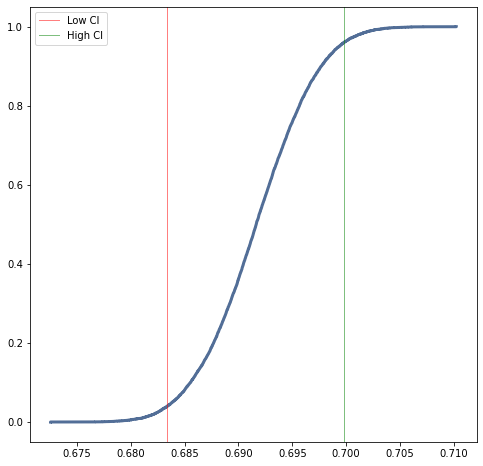

In [136]:
thinkplot.Cdf(cdf)
thinkplot.axvline(ci[0], color="red", label="Low CI")
thinkplot.axvline(ci[1], color="green", label="High CI")
thinkplot.Config()

<h1>What are the odds...(10 pts)</h1>

M&M's are small candy-coated chocolates that come in a variety of colors.  
Mars, Inc., which makes M&M's, changes the mixture of colors from time to time.
In 1995, they introduced blue M&M's.  

* In 1994, the color mix in a bag of plain M&M's was 30\% Brown, 20\% Yellow, 20\% Red, 10\% Green, 10\% Orange, 10\% Tan.  

* In 1996, it was 24\% Blue , 20\% Green, 16\% Orange, 14\% Yellow, 13\% Red, 13\% Brown.

Suppose a friend of mine has two bags of M&M's, and he tells me
that one is from 1994 and one from 1996.  He won't tell me which is
which, but he gives me one M&M from each bag.  One is yellow and
one is green.  What is the probability that the yellow one came
from the 1994 bag?

Hint: The trick to this question is to define the hypotheses and the data carefully.

Hypotheses:

* If first bag is 1994, second bag is 1996

* If first bag is 1996, second bag is 1994

Probability(1994) = 1/2 and Probability(1996) = 1/2


In [30]:
#Probability
table = pd.DataFrame(index=['1994', '1996'])
table

""
1994
1996


In [31]:
table['prior'] = 1/2, 1/2
table

,prior
1994,0.5
1996,0.5


* If bag is given as 1994, probability of yellow is 20/100. Then, green is from 1996, its probability is 20/100.
    - P(yellow|1994) = 20/100
    - P(green|1996) = 20/100
* If bag is given as 1996, probability of yellow is 14/100. Then, green is from 1994, its probability is 10/100.
    - P(yellow|1996) = 14/100
    - P(green|1994) = 10/100

In [32]:
table['likelihood'] = (20/100)*(20/100), (14/100)*(10/100)
table

,prior,likelihood
1994,0.5,0.040
1996,0.5,0.014


In [33]:
#Calculate unnormalized probabilities
table['unnorm'] = table['prior'] * table['likelihood']
table


,prior,likelihood,unnorm
1994,0.5,0.040,0.020
1996,0.5,0.014,0.007


In [34]:
prob_data = table['unnorm'].sum()
print("Unnorms:", prob_data)

Unnorms: 0.027000000000000003


In [35]:
table['posterior'] = table['unnorm'] / prob_data
table

,prior,likelihood,unnorm,posterior
1994,0.5,0.040,0.020,0.740741
1996,0.5,0.014,0.007,0.259259


* If first bag is 1994, probability that yellow from 1994 is 0.740741.
* If first bag is 1996, probability that yellow from 1994 is 0.259259.

<h1>911 Calls (10pts)</h1>
<ul>
<li>For this data, what is the mean time in between 911 calls. (Note: this will require some manipulation of data - Google "pandas date" and "date difference in minutes" as a starting point. It is not super complex, apx 2-4 lines or so) (5pts)
<li>What is a good distribution to model this? (5pts)
</ul>

In [2]:
#read file - Don't change this part. 
calls = ""
with ZipFile('911_2.csv.zip') as myzip:
    with myzip.open('911_2.csv') as myfile:
       calls = pd.read_csv(myfile)
calls.head()

,zip,title,timeStamp,twp
0,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10,NEW HANOVER
1,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29,HATFIELD TOWNSHIP
2,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39,NORRISTOWN
3,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47,NORRISTOWN
4,NaN,EMS: DIZZINESS,2015-12-10 16:56,LOWER POTTSGROVE


In [127]:
#calls["timeStamp"] = pd.to_datetime(calls["timeStamp"]).sort_values(ascending=False)
calls.head(10)

,zip,title,timeStamp,twp
0,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10,NEW HANOVER
1,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29,HATFIELD TOWNSHIP
2,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39,NORRISTOWN
3,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47,NORRISTOWN
4,NaN,EMS: DIZZINESS,2015-12-10 16:56,LOWER POTTSGROVE
5,19446.0,EMS: HEAD INJURY,2015-12-10 15:39,LANSDALE
6,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46,HORSHAM
7,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17,SKIPPACK
8,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51,LOWER SALFORD
9,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35,PLYMOUTH


In [10]:
#Generate Time Between Calls
#calls["TimeDiff"] = calls.set_index('timeStamp').diff()
#calls['TimeDiff'] = calls['timeStamp'].diff().apply(lambda x: x/np.timedelta64(1, 'm')).fillna(0).astype('int64')
#calls['TimeDiff'] = pd.to_timedelta(calls['timeStamp'].astype(str)).diff(-1).dt.total_seconds().div(60)


calls['TimeDiff'] = pd.to_datetime(calls['timeStamp'].astype(str)).diff().dt.total_seconds().div(60)
calls.head(10)

,zip,title,timeStamp,twp,TimeDiff
0,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10,NEW HANOVER,NaN
1,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29,HATFIELD TOWNSHIP,19.0
2,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39,NORRISTOWN,-170.0
3,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47,NORRISTOWN,128.0
4,NaN,EMS: DIZZINESS,2015-12-10 16:56,LOWER POTTSGROVE,9.0
5,19446.0,EMS: HEAD INJURY,2015-12-10 15:39,LANSDALE,-77.0
6,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46,HORSHAM,67.0
7,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17,SKIPPACK,-29.0
8,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51,LOWER SALFORD,34.0
9,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35,PLYMOUTH,44.0


In [40]:
import time
calls2 = pd.DataFrame()
calls2["timeStamp2"] = pd.to_datetime(calls["timeStamp"], format="%Y-%m-%d %H:%M").sort_values()


In [41]:
calls2.head(10)

,timeStamp2
2,2015-12-10 14:39:00
5,2015-12-10 15:39:00
7,2015-12-10 16:17:00
11,2015-12-10 16:32:00
6,2015-12-10 16:46:00
3,2015-12-10 16:47:00
8,2015-12-10 16:51:00
4,2015-12-10 16:56:00
14,2015-12-10 17:09:00
0,2015-12-10 17:10:00


In [42]:
calls2['TimeDiff2'] = pd.to_datetime(calls2['timeStamp2'].astype(str)).diff().dt.total_seconds().div(60)
calls2.head(10)


,timeStamp2,TimeDiff2
2,2015-12-10 14:39:00,NaN
5,2015-12-10 15:39:00,60.0
7,2015-12-10 16:17:00,38.0
11,2015-12-10 16:32:00,15.0
6,2015-12-10 16:46:00,14.0
3,2015-12-10 16:47:00,1.0
8,2015-12-10 16:51:00,4.0
4,2015-12-10 16:56:00,5.0
14,2015-12-10 17:09:00,13.0
0,2015-12-10 17:10:00,1.0


In [43]:
calls2["TimeDiff2"].describe()

count    663521.000000
mean          3.674330
std           5.417089
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         786.000000
Name: TimeDiff2, dtype: float64

<ul>
<li>mean time in between 911 calls:     3.674 minutes
</ul>

In [49]:
calls2 = calls2.dropna()

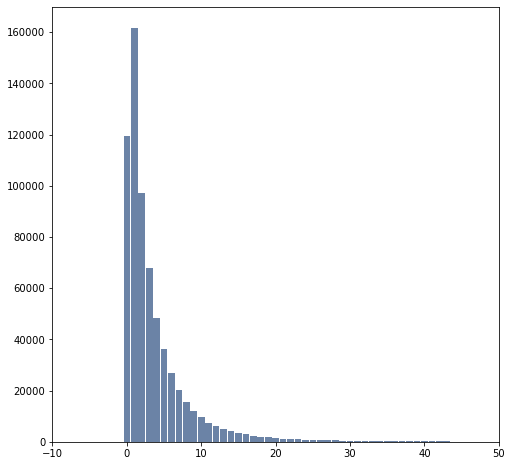

In [56]:
hist = thinkstats2.Hist(calls2["TimeDiff2"])
thinkplot.Hist(hist)
thinkplot.Config(xlim=[-10, 50])

In [57]:
def bigGraph(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(data)
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2)
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

C:\Users\soniy\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\repos\3450_Asn3_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


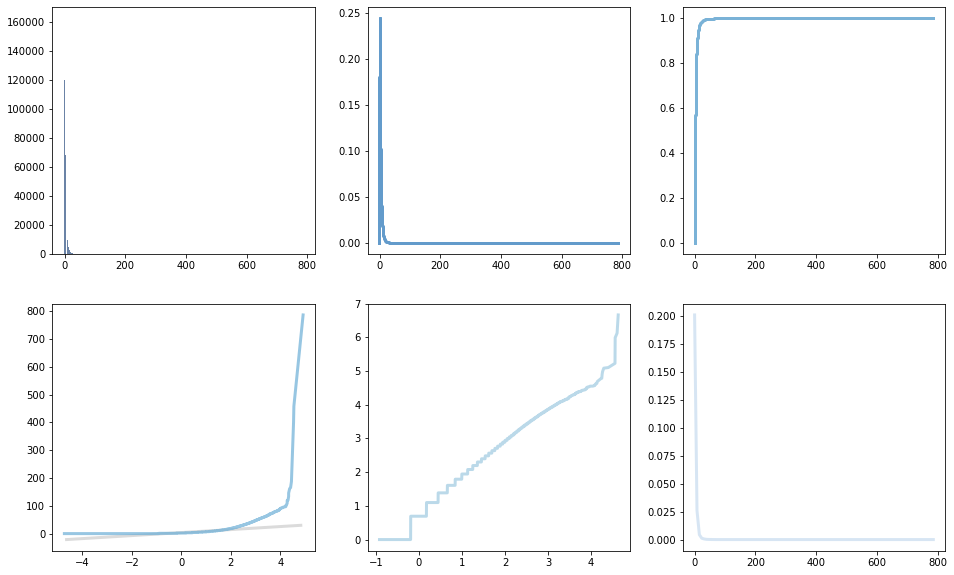

In [58]:
bigGraph(calls2, "TimeDiff2")

<ul>
<li>Good distribution to model time difference is Lognormal distribution.
<li>The range of time difference is between 0 to 786. In the portion, say between 0 and 50, the plot follows a lognormal distribution.

</ul>